## Dataset Metadata

- **Dataset Name**: US Health Insurance Dataset

- **Description**: This dataset contains information about individuals' health insurance costs. It includes various attributes such as age, sex, BMI, the number of children, smoking status, region, and the total charges for insurance. This data can be used for analyzing health insurance pricing and its influencing factors.

**Size**: 1338 rows and 7 columns

---

### Features

| Feature Name | Data Type | Description                                       | Example Value |
|--------------|-----------|---------------------------------------------------|---------------|
| `age`       | int64     | The age of the individual.                        | 29            |
| `sex`       | object    | The gender of the individual (male or female).   | female        |
| `bmi`       | float64   | Body Mass Index of the individual.                | 22.4          |
| `children`  | int64     | The number of children covered by the insurance.  | 2             |
| `smoker`    | object    | Smoking status (yes or no).                       | yes           |
| `region`    | object    | The region where the individual lives.            | southeast      |
| `charges`   | float64   | The total medical charges incurred by the individual. | 6200.50      |

### Target Variable

- **Target Variable**: `charges`
- **Description**: The total medical charges incurred by the individual for health insurance.
- **Data Type**: float64
- **Example Value**: 6200.50


### Data Quality

- **Missing Values**: No missing values are present in the dataset.

### Use Cases

- Predicting health insurance costs based on individual characteristics.
- Analyzing the impact of various factors (like age, smoking status, and BMI) on insurance charges.
- Segmentation of insurance plans based on regional differences and individual attributes.

---

## Import Libraries

In [1]:
# importing basic libraries 
import pandas as pd 
import numpy as np 

# visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

# preprocessing libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, mutual_info_regression, f_regression, RFE

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# model tunning 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, roc_auc_score

# model interpretability
import shap

# saving models 
import pickle, joblib

# import warnings
import warnings
warnings.filterwarnings('ignore')

## Load The Data

In [2]:
# load the data
df = pd.read_csv("/kaggle/input/ushealthinsurancedataset/insurance.csv")

## Exploratory Data Analysis

### 1. Basic EDA

In [3]:
# show the head of the data 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# show the tail of the data 
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# show info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check summary statistics of the data 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# checking unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
# checking duplicate values
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [9]:
# dropping duplicated values 
df.drop_duplicates(inplace=True)

In [10]:
# rows, columns
df.shape

(1337, 7)

### 2. Missing Values Inspection

In [11]:
# check for missing values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3. Categorical Feature Distribution	

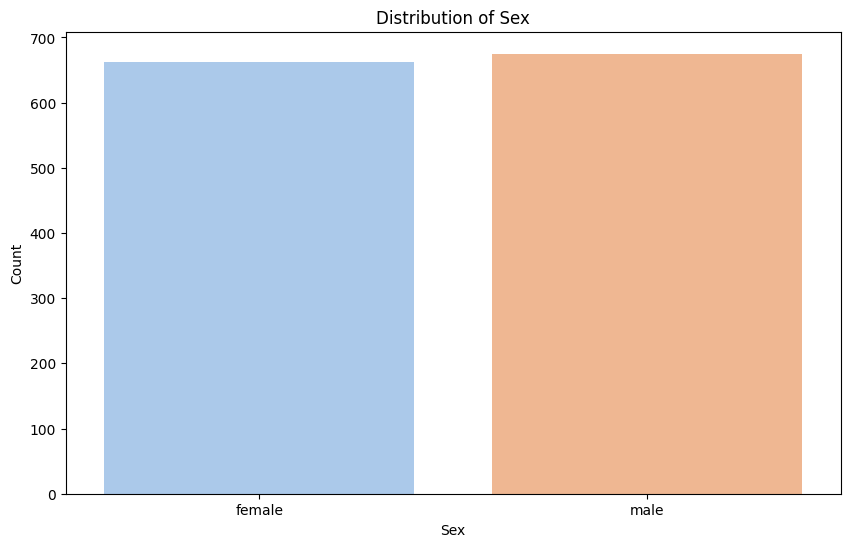

In [12]:
# plotting the distribution of the 'sex' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

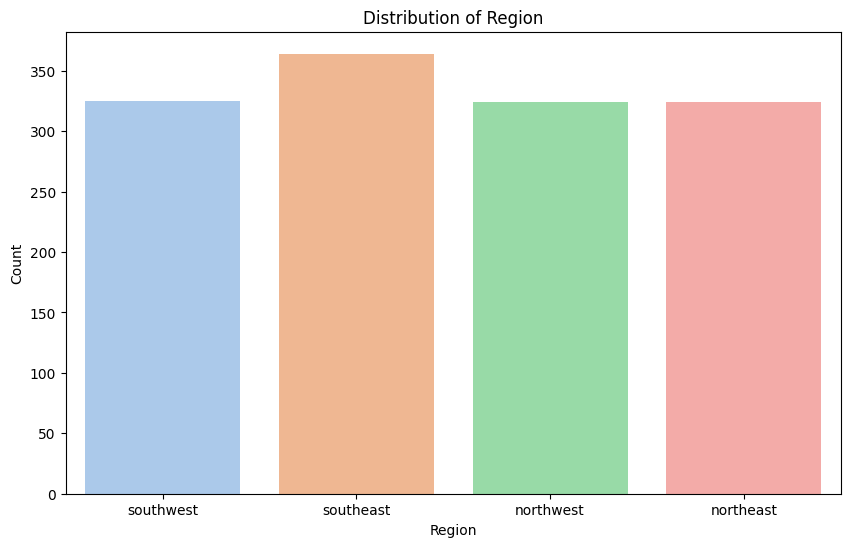

In [13]:
# plotting the distibution of the 'region' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, palette='pastel')
plt.title('Distribution of Region')
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

### 4. Numerical Feature Distribution

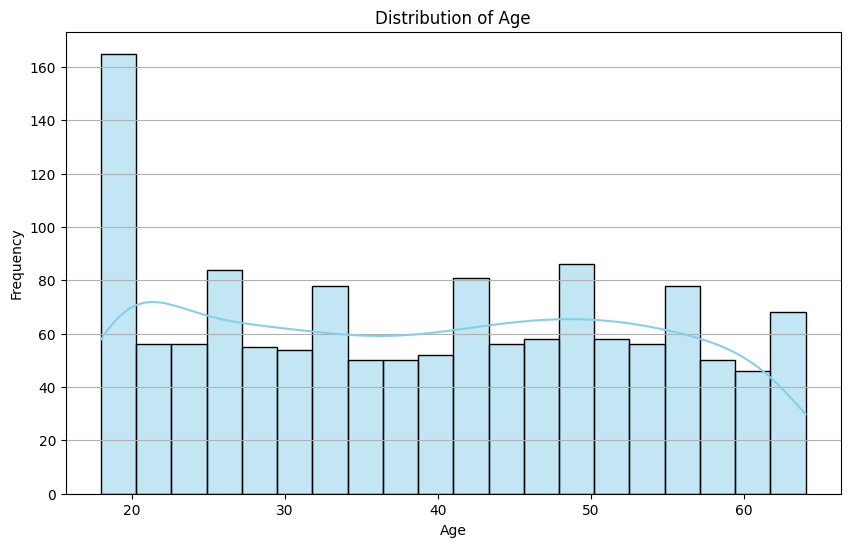

In [14]:
# plotting the distribution of the 'age' feature 
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

### 5. Pairplot Visualization

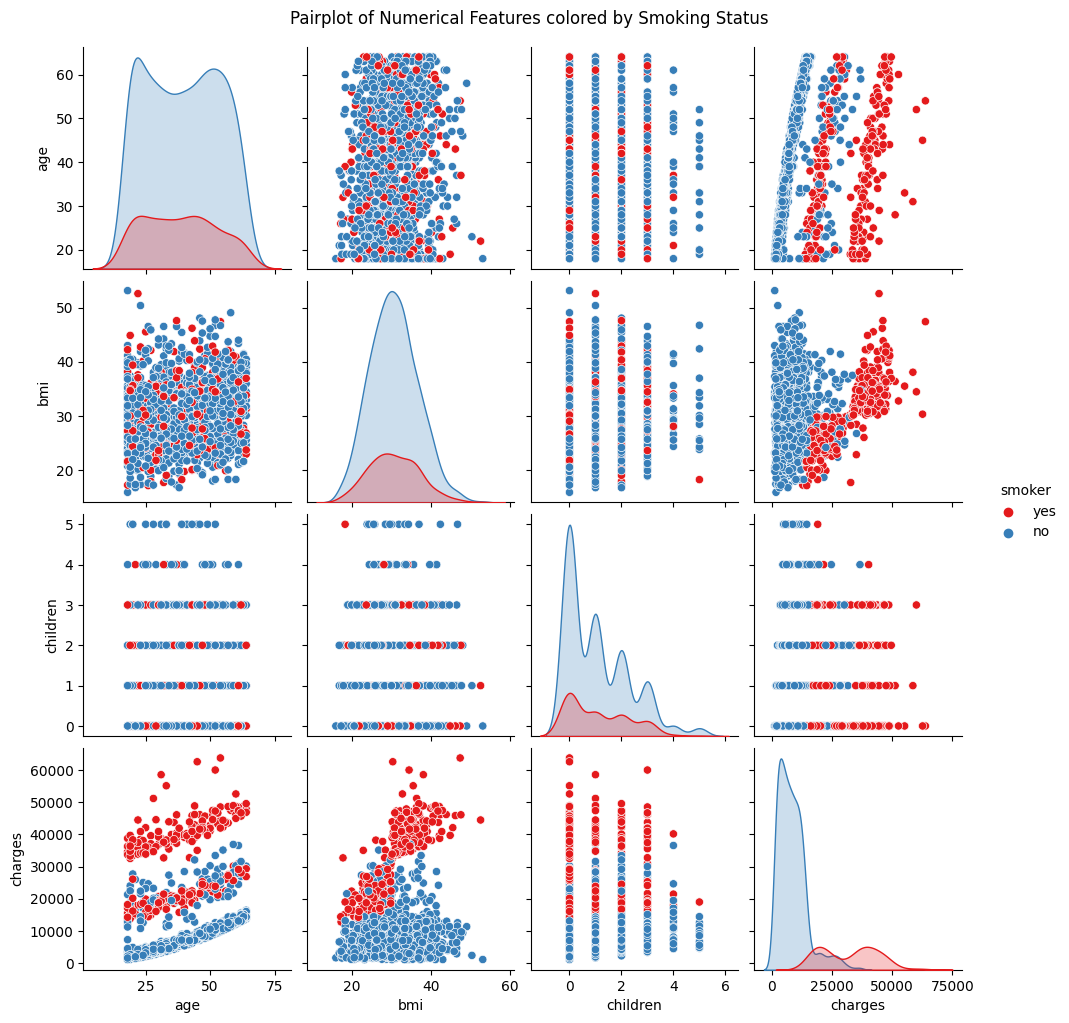

In [15]:
# creating a pariplot to explore relationship between numerical features
sns.pairplot(df, hue='smoker', palette='Set1', diag_kind='kde')

# display the plot
plt.suptitle('Pairplot of Numerical Features colored by Smoking Status', y=1.02)
plt.show()

### 6. Boxplot Visualizations for Outlier Detection

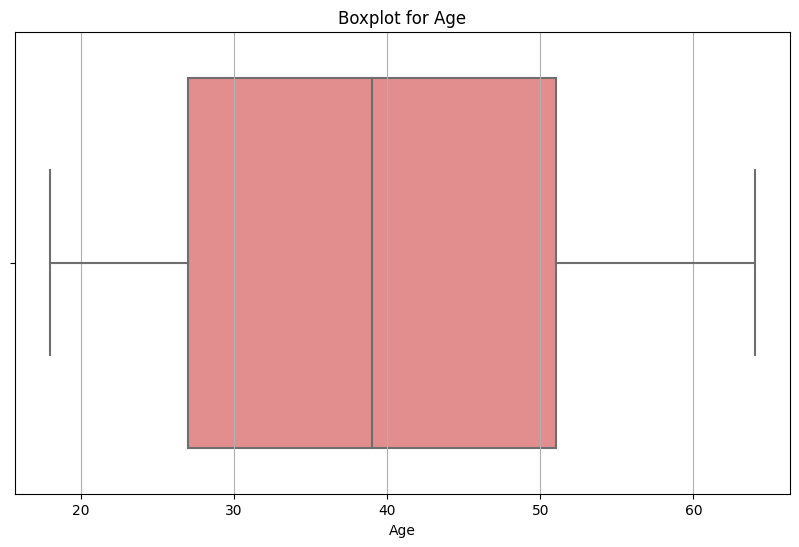

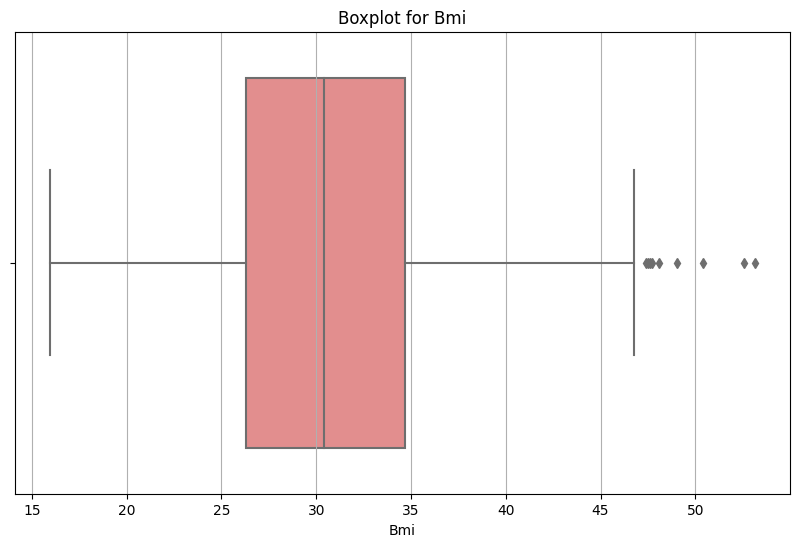

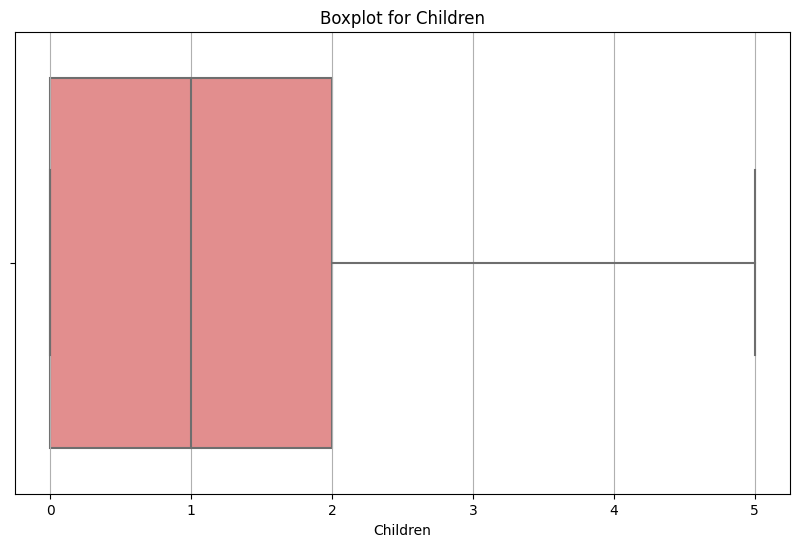

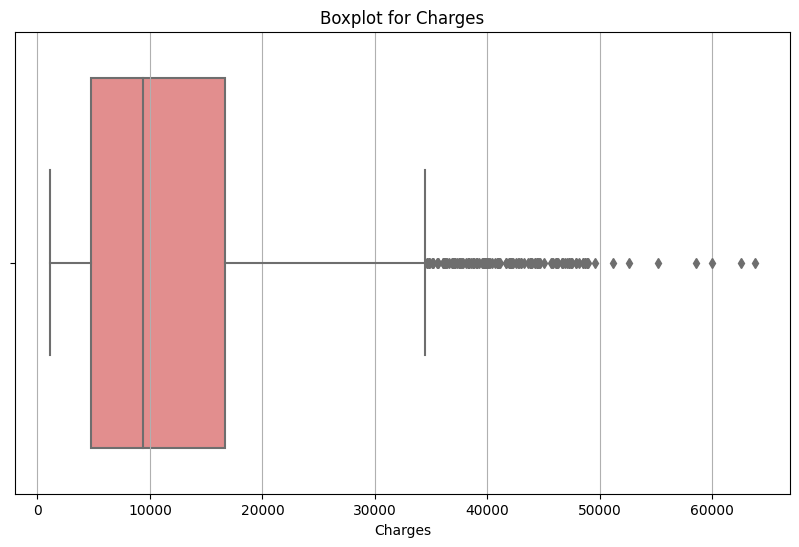

In [16]:
# list of numerical features 
numerical_features = ['age', 'bmi', 'children', 'charges']

# loop to create boxplots for each numerical features
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=feature, data=df, color='lightcoral')
    plt.title(f'Boxplot for {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.grid(axis='x')
    plt.show()

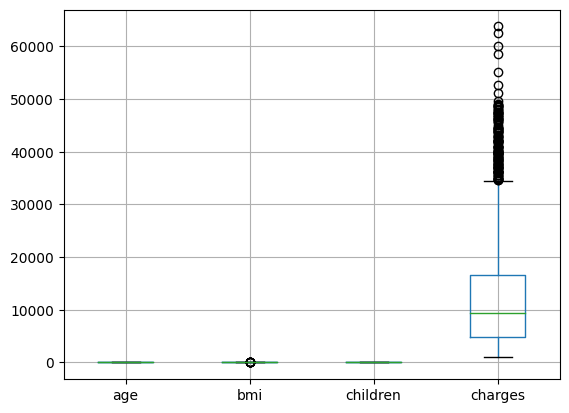

In [17]:
df.boxplot(numerical_features)
plt.show()

#### 1. Removing Outliers using IQR

In [18]:
# calculate the IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# define a function to filter out outliers 
def remove_outliers(df, featues):
    # create a mask for rows without outliers
    mask = True
    for feature in numerical_features:
        mask &= (df[feature] >= (Q1[feature] - 1.5 * IQR[feature])) & (df[feature] <= (Q3[feature] + 1.5 * IQR[feature]))
    return df[mask]

# remove outliers from the dataframe
df_cleaned = remove_outliers(df, numerical_features)

# display the cleaned df
print("Original Dataframe Shape:", df.shape)
print("Cleaned Dataframe Shape:", df_cleaned.shape)

Original Dataframe Shape: (1337, 7)
Cleaned Dataframe Shape: (1192, 7)


### 7. Scatter Plot

How does the relationship between age and charges vary by smoking status?

In [19]:
# interactive scatter plot
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    title='Interactive Scatter Plot of Age vs. Charges Vary by Smoking  Status',
    labels={'age': 'Age',  'charges': 'Charges'},
    hover_name='smoker',
    color_discrete_sequence=['blue', 'red']
)

fig.show()

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Encoding

In [21]:
# initialize encoder 
le = LabelEncoder()

# encode binary categorical features 
binary_features = ['sex', 'smoker']
for feature in binary_features:
    df[feature] = le.fit_transform(df[feature])

# encode categorical features with more than two categories 
multiclass_features = ['region']
df = pd.get_dummies(df, columns=multiclass_features, drop_first=True)

# display the transformed data
print("\nTransformed DataFrame after Encoding:")
print(df.head())


Transformed DataFrame after Encoding:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [22]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


## Feature Scaling & Normalization

In [23]:
# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

Shape of the cleaned DataFrame: (1192, 7)


In [24]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [25]:
# Feature Scaling with StandardScaler
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Feature Scaling with MinMaxScaler
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

In [26]:
# Display the scaled DataFrames
print("\nStandard Scaled DataFrame:")
df_standard_scaled.head()


Standard Scaled DataFrame:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.440418,0,-0.453160,-0.909234,1,0.297857,False,False,True
1,-1.511647,1,0.509422,-0.079442,0,-0.954381,False,True,False
2,-0.799350,1,0.383155,1.580143,0,-0.729373,False,True,False
3,-0.443201,1,-1.305052,-0.909234,0,0.719104,True,False,False
4,-0.514431,1,-0.292456,-0.909234,0,-0.777499,True,False,False


In [27]:
print("\nMinMax Scaled DataFrame:")
df_minmax_scaled.head()


MinMax Scaled DataFrame:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,0.251611,False,False,True
1,0.000000,1,0.479150,0.2,0,0.009636,False,True,False
2,0.217391,1,0.458434,0.6,0,0.053115,False,True,False
3,0.326087,1,0.181464,0.0,0,0.333010,True,False,False
4,0.304348,1,0.347592,0.0,0,0.043816,True,False,False


## Feature Selection

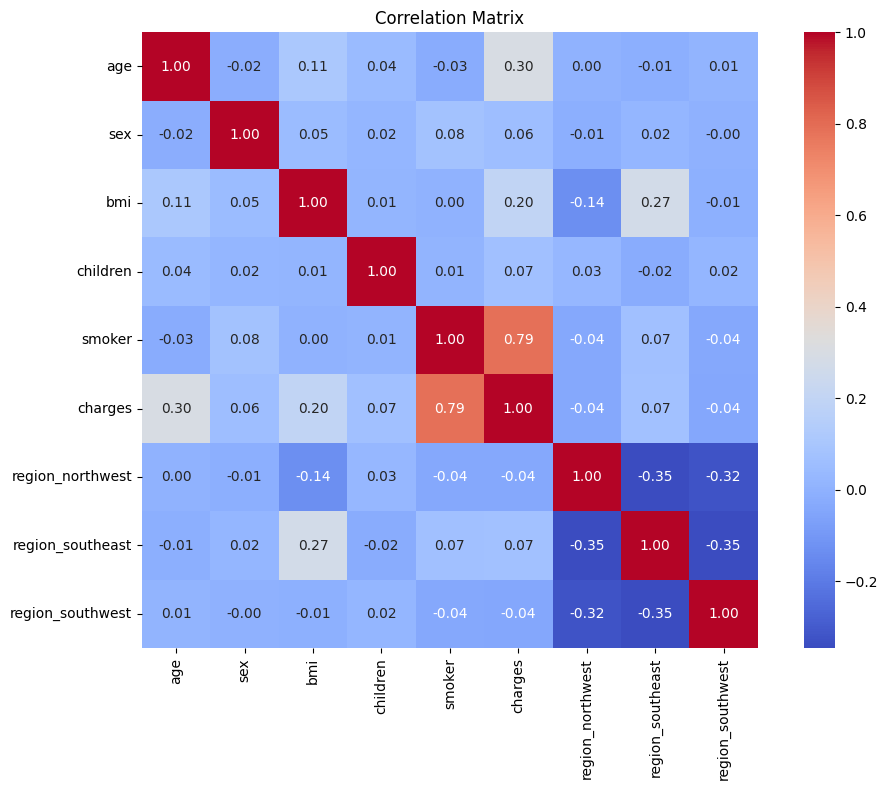

In [28]:
# Calculate the correlation matrix
correlation_matrix = df_minmax_scaled.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Drop highly correlated features
threshold = 0.9  
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

In [30]:
# Dropping the highly correlated features
df_reduced = df_minmax_scaled.drop(columns=to_drop)

print(f"Dropped features due to high correlation: {to_drop}")

Dropped features due to high correlation: set()


In [31]:
# Define features and target variable
X = df_reduced.drop(columns='charges')  # Replace 'charges' with your target variable
y = df_reduced['charges']  # Replace 'charges' with your target variable

# Apply SelectKBest
k = 5  # Adjust K as necessary
select_k_best = SelectKBest(k=k)
X_new = select_k_best.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[select_k_best.get_support()]

print(f"Selected features using SelectKBest: {selected_features.tolist()}")

Selected features using SelectKBest: ['children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']


In [32]:
# Step 3: Feature Selection using RFE
model = LinearRegression()  
rfe = RFE(estimator=model, n_features_to_select=k)  # Adjust K as necessary
rfe.fit(X, y)

# Get selected features from RFE
rfe_selected_features = X.columns[rfe.support_]

print(f"Selected features using RFE: {rfe_selected_features.tolist()}")

Selected features using RFE: ['age', 'bmi', 'children', 'smoker', 'region_southeast']


## Splitting The Data into X and Y 

In [33]:
# Use train_test_split to create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1069 samples
Test set size: 268 samples


In [34]:
# Step 1: Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
}

# Step 2: Train models and evaluate using cross-validation
results = {}
for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Change scoring as needed
    results[model_name] = {
        "Mean CV Score": -cv_scores.mean(),  # Negate to get actual mean squared error
        "CV Scores": -cv_scores  # Store raw CV scores for reference
    }
    # Fit the model on the training data
    model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 8
[LightGBM] [Info] Start training from score 0.189606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 8
[LightGBM] [I

In [35]:
# Step 3: Display results
for model_name, metrics in results.items():
    print(f"{model_name}: Mean CV Score = {metrics['Mean CV Score']:.2f}, CV Scores = {metrics['CV Scores']}")

Linear Regression: Mean CV Score = 0.01, CV Scores = [0.01184695 0.00830195 0.0085833  0.00961318 0.00946705]
Decision Tree: Mean CV Score = 0.01, CV Scores = [0.01017817 0.01072922 0.00975348 0.01329553 0.01282347]
Random Forest: Mean CV Score = 0.01, CV Scores = [0.00747888 0.00587129 0.00550328 0.00579033 0.00664745]
XGBoost: Mean CV Score = 0.01, CV Scores = [0.00854626 0.0069033  0.00642508 0.00657005 0.00681157]
LightGBM: Mean CV Score = 0.01, CV Scores = [0.00847546 0.00598539 0.00593489 0.00562598 0.00637195]


## Model Evaluation

Linear Regression: MSE = 0.01, R² = 0.81
Decision Tree: MSE = 0.01, R² = 0.81
Random Forest: MSE = 0.01, R² = 0.88
XGBoost: MSE = 0.01, R² = 0.86
LightGBM: MSE = 0.01, R² = 0.89


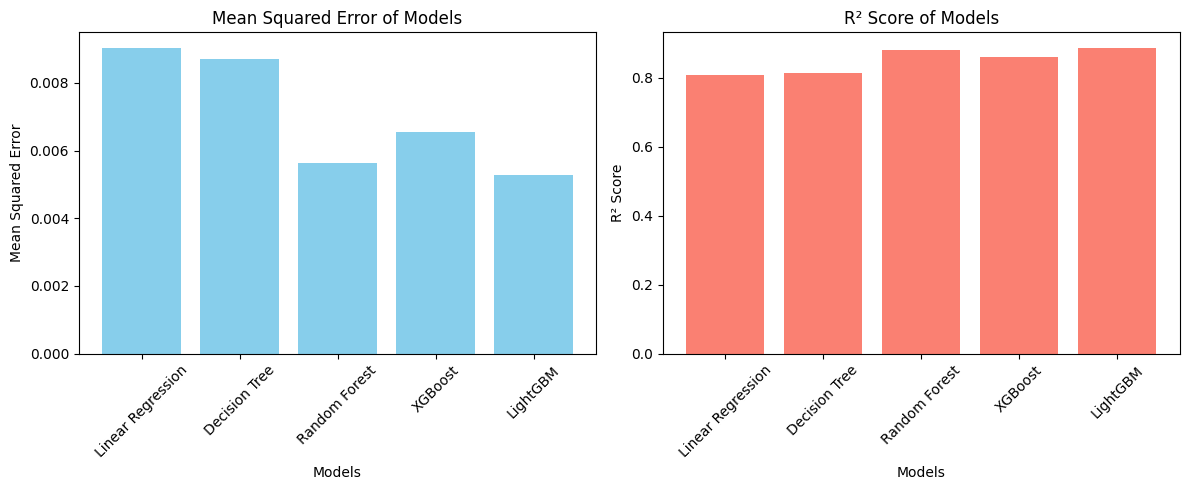

In [36]:
# Step 1: Evaluate models on the test set
evaluation_results = {}
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error and R² Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    evaluation_results[model_name] = {
        "Mean Squared Error": mse,
        "R² Score": r2
    }

# Step 2: Display evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}: MSE = {metrics['Mean Squared Error']:.2f}, R² = {metrics['R² Score']:.2f}")

# Step 3: Plotting the evaluation metrics
model_names = list(evaluation_results.keys())
mse_values = [metrics['Mean Squared Error'] for metrics in evaluation_results.values()]
r2_values = [metrics['R² Score'] for metrics in evaluation_results.values()]

# Create a figure for plotting
plt.figure(figsize=(12, 5))

# Subplot for Mean Squared Error
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Mean Squared Error of Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Subplot for R² Score
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='salmon')
plt.title('R² Score of Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


`Best Model`
* LightGBM has the highest R² score of 0.89, indicating that it explains 89% of the variance in the target variable. It also has a Mean Squared Error (MSE) of 0.01, which is consistent with the other models.
* Random Forest follows closely with an R² score of 0.88.

In [37]:
# Step 1: Define the best model
best_model = LGBMRegressor(random_state=42)

# Step 2: Fit the model on the training data
best_model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = best_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model (LGBMRegressor) MSE: {mse:.4f}, R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 8
[LightGBM] [Info] Start training from score 0.190081
Best Model (LGBMRegressor) MSE: 0.0053, R² Score: 0.8872


## Model Interpretation

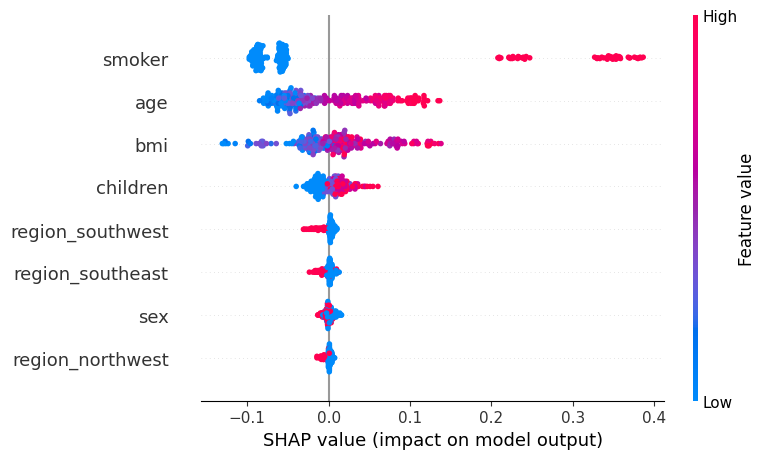

In [38]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Step 1: Create a SHAP Tree Explainer
explainer = shap.TreeExplainer(best_model)

# Step 2: Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Step 3: Visualize the SHAP values
# 3a: Summary plot
shap.summary_plot(shap_values, X_test)